In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 学習用データの読み込み
df = np.loadtxt('../files/click.csv', delimiter=',', skiprows=1)

In [3]:
train_x = df[:, 0]
train_y = df[:, 1]

# 多項式回帰

$ f\theta(x) = \theta_0 + \theta_1x + \theta_2x  $

- パラメタと特徴量をベクトルとして考えて積をとる

$
    X\theta = \begin{bmatrix} 
    1 & x^{(1)} & x^{(1)^2} \\ 
    1  & x^{(2)} & x^{(2)^2}  \\ 
    1 & x ^{(3)} & x^{(3)^2} \\ 
    \dots \\ 
    1 & x ^{(n)} & x^{(n)^2} \\ 
    \end{bmatrix}
    \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \end{bmatrix}
    =
    \begin{bmatrix}
    \theta_0 + \theta_1x^{(1)} + \theta_2x^{(1)^2}\\
    \theta_0 + \theta_1x^{(2)} + \theta_2x^{(2)^2}\\
    \dots \\ 
    \theta_0 + \theta_1x^{(n)} + \theta_2x^{(n)^2}\\
    \end{bmatrix}
$

In [4]:
# パラメタの初期化
theta = np.random.rand(3)

In [5]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [6]:
# 学習データの行列を作る
def to_matrix(x):
    # np.onesは、値１の配列を作る(=特徴量0をつくっている)
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

In [7]:
# 訓練データの標準化
train_z = standardize(train_x) 

In [8]:
X = to_matrix(train_z)

In [9]:
# 予測関数
def f(x):
    return np.dot(x, theta)

In [10]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

### パラメタ更新式

$\displaystyle \theta_j := \theta_j - \eta \sum_{i=1}^n(f_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$

- パラメタ更新式はベクトルの直積として考えることができる

In [11]:
# 学習率
ETA = 1e-3

In [12]:
# 誤差の差分
diff = 1

In [13]:
# 更新回数
count = 0

In [14]:
# 学習
error = E(X, train_y)
while diff > 1e-2:
    # パラメタを更新
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 前回との誤差との差分を計算
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
    # ログ出力
    count += 1
    log = '{}回目: theta0 = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta0 = [9.44323381 2.50718502 9.38070144], 差分 = 152934.1516
2回目: theta0 = [17.6497551   4.33962942 17.78228303], 差分 = 137689.0950
3回目: theta0 = [25.52411434  6.14707945 25.65623192], 差分 = 124047.8491
4回目: theta0 = [33.08350741  7.92930308 33.03214484], 差分 = 111839.5633
5回目: theta0 = [40.34419437  9.68611397 39.93798478], 差分 = 100911.6479
6回目: theta0 = [47.32155079 11.41736829 46.400171  ], 差分 = 91127.8204
7回目: theta0 = [54.03011635 13.12296176 52.44366396], 差分 = 82366.3610
8回目: theta0 = [60.48364074 14.80282678 58.09204573], 差分 = 74518.5546
9回目: theta0 = [66.69512701 16.45692984 63.36759583], 差分 = 67487.2995
10回目: theta0 = [72.67687256 18.08526898 68.29136301], 差分 = 61185.8650
11回目: theta0 = [78.44050785 19.6878715  72.88323298], 差分 = 55536.7824
12回目: theta0 = [83.99703303 21.26479173 77.16199252], 差分 = 50470.8539
13回目: theta0 = [89.35685252 22.81610897 81.14538994], 差分 = 45926.2684
14回目: theta0 = [94.52980767 24.34192556 84.85019232], 差分 = 41847.8112
15回目: theta0 = [99.52520767

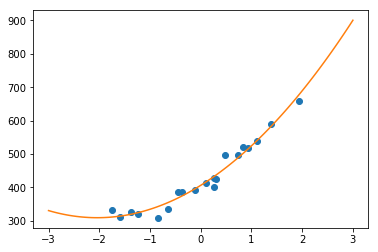

In [15]:
# 学習結果を描画
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))

### 予測/検証

In [16]:
f(standardize(100))

array([-251.9681353 ,  -59.06220769,  -14.46292405])

In [17]:
f(standardize(200))

array([353.72449764,  82.9142531 ,  20.3037203 ])

In [18]:
f(standardize(300))

array([959.41713058, 224.89071389,  55.07036466])